# WeatherPy_HW Richa Singh
----

### Analysis
1. The relationship between rising temperature as we move closer to the equator 0 Degree Latitude is evident from the scatter plot "Temprature Vs Latitude. Around 0 Degree equator mark, we observe high temperatures. There is a peaking of temperatures observed at this point, with falling tempratures as we move further away
2. The relationship between humidilty and latitidue is not very explicit in the scatter plot "Humidity Vs Latitude". However there is some rise in humidity between the equator and 20 degrees north of the equator.
3. The relationship between cloudiness and wind speed is not established and there is no clear correlation between these and proximity to the equator
---

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
 

599

In [3]:
cities_df = pd.DataFrame(cities)
cities_df= cities_df.rename(columns={0:"City"}) 
cities_df.head()

,City
0,clyde river
1,tasiilaq
2,hobyo
3,buraydah
4,newnan


In [4]:
# set up additional columns to hold information
cities_df['Date'] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['WindSpeed'] = ""

cities_df.head()

,City,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,clyde river,,,,,,,
1,tasiilaq,,,,,,,
2,hobyo,,,,,,,
3,buraydah,,,,,,,
4,newnan,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
params = {"key":  api_key}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in cities_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    city = row['City']
    
    query_url = f"{url}appid={api_key}&q={city}"
    
   
    # update coord key value
    params['coord'] = f"{city}"

    # make request
    cities_lat_lng = requests.get(query_url, params=params)
   
    print(cities_lat_lng.url)
    
     # convert to json
    cities_lat_lng = cities_lat_lng.json()
    try:  
        cities_df.loc[index, "Date"] = cities_lat_lng['dt']
        cities_df.loc[index, "Latitude"] = cities_lat_lng["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = cities_lat_lng["coord"]["lon"]
        cities_df.loc[index, "Temperature"] = cities_lat_lng['main']['temp']
        cities_df.loc[index, "Humidity"] = cities_lat_lng['main']['humidity']
        cities_df.loc[index, "Cloudiness"] = cities_lat_lng['clouds']['all']
        cities_df.loc[index, "WindSpeed"] = cities_lat_lng['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=clyde%20river&key=6adbc5518ba96cb735be453405ebb77c&coord=clyde+river
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=tasiilaq&key=6adbc5518ba96cb735be453405ebb77c&coord=tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=hobyo&key=6adbc5518ba96cb735be453405ebb77c&coord=hobyo
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=buraydah&key=6adbc5518ba96cb735be453405ebb77c&coord=buraydah
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=newnan&key=6adbc5518ba96cb735be453405ebb77c&coord=newnan
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=ushuaia&key=6adbc5518ba96cb735be453405ebb77c&coord=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=port%20alfred&key=6adb

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=bandarbeyla&key=6adbc5518ba96cb735be453405ebb77c&coord=bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=soe&key=6adbc5518ba96cb735be453405ebb77c&coord=soe
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=lasa&key=6adbc5518ba96cb735be453405ebb77c&coord=lasa
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=amderma&key=6adbc5518ba96cb735be453405ebb77c&coord=amderma
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=mataura&key=6adbc5518ba96cb735be453405ebb77c&coord=mataura
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=cape%20town&key=6adbc5518ba96cb735be453405ebb77c&coord=cape+town
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=naryan-mar&key=6adbc5518ba96cb735be453405ebb77c&coord=naryan-mar
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=mayo&key=6adbc5518ba96cb735be453405ebb77c&coord=mayo
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=anloga&key=6adbc5518ba96cb735be453405ebb77c&coord=anloga
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=sapulpa&key=6adbc5518ba96cb735be453405ebb77c&coord=sapulpa
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=ahipara&key=6adbc5518ba96cb735be453405ebb77c&coord=ahipara
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=hasaki&key=6adbc5518ba96cb735be453405ebb77c&coord=hasaki
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=manacapuru&key=6adbc5518ba96cb735b

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=romuli&key=6adbc5518ba96cb735be453405ebb77c&coord=romuli
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=valparaiso&key=6adbc5518ba96cb735be453405ebb77c&coord=valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=severo-kurilsk&key=6adbc5518ba96cb735be453405ebb77c&coord=severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=aasiaat&key=6adbc5518ba96cb735be453405ebb77c&coord=aasiaat
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=tondano&key=6adbc5518ba96cb735be453405ebb77c&coord=tondano
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=nome&key=6adbc5518ba96cb735be453405ebb77c&coord=nome
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=kloulklubed&key=6a

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=demirci&key=6adbc5518ba96cb735be453405ebb77c&coord=demirci
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=bonavista&key=6adbc5518ba96cb735be453405ebb77c&coord=bonavista
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=bolonchen&key=6adbc5518ba96cb735be453405ebb77c&coord=bolonchen
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=grand%20river%20south%20east&key=6adbc5518ba96cb735be453405ebb77c&coord=grand+river+south+east
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=tracy&key=6adbc5518ba96cb735be453405ebb77c&coord=tracy
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=port%20elizabeth&key=6adbc5518ba96cb735be453405ebb77c&coord=port+eliz

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=san%20rafael&key=6adbc5518ba96cb735be453405ebb77c&coord=san+rafael
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=thompson&key=6adbc5518ba96cb735be453405ebb77c&coord=thompson
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=gander&key=6adbc5518ba96cb735be453405ebb77c&coord=gander
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=saint-philippe&key=6adbc5518ba96cb735be453405ebb77c&coord=saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=pansemal&key=6adbc5518ba96cb735be453405ebb77c&coord=pansemal
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=cienaga%20de%20flores&key=6adbc5518ba96cb735be453405ebb77c&coord=cienaga+de+flores
Missing field/result... skipping.
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=samarai&key=6adbc5518ba96cb735be453405ebb77c&coord=samarai
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=ust-ilimsk&key=6adbc5518ba96cb735be453405ebb77c&coord=ust-ilimsk
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=vestmannaeyjar&key=6adbc5518ba96cb735be453405ebb77c&coord=vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=van%20buren&key=6adbc5518ba96cb735be453405ebb77c&coord=van+buren
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=rungata&key=6adbc5518ba96cb735be453405ebb77c&coord=rungata
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=muzhi&key=6adbc5518ba96cb735be453405ebb77c&coord=muzhi
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=vila%20franca%20do%20campo&key=6adbc5518ba96cb735be453405ebb77c&coord=vila+franca+do+campo
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=souillac&key=6adbc5518ba96cb735be453405ebb77c&coord=souillac
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=talnakh&key=6adbc5518ba96cb735be453405ebb77c&coord=talnakh
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=mugur-aksy&key=6adbc5518ba96cb735be453405ebb77c&coord=mugur-aksy
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=loa%20janan&key=6adbc5518ba96cb735be453405ebb77c&coord=loa+janan
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=mercedes&key=6adbc5518ba96cb735be453405ebb77c&coord=mercedes
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb73

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=illapel&key=6adbc5518ba96cb735be453405ebb77c&coord=illapel
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=saint-augustin&key=6adbc5518ba96cb735be453405ebb77c&coord=saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=palamos&key=6adbc5518ba96cb735be453405ebb77c&coord=palamos
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=lexington&key=6adbc5518ba96cb735be453405ebb77c&coord=lexington
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=groa&key=6adbc5518ba96cb735be453405ebb77c&coord=groa
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=kushiro&key=6adbc5518ba96cb735be453405ebb77c&coord=kushiro
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=bashtanka&key=6adb

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=abha&key=6adbc5518ba96cb735be453405ebb77c&coord=abha
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=jegunovce&key=6adbc5518ba96cb735be453405ebb77c&coord=jegunovce
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=baghdad&key=6adbc5518ba96cb735be453405ebb77c&coord=baghdad
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=dongsheng&key=6adbc5518ba96cb735be453405ebb77c&coord=dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=margate&key=6adbc5518ba96cb735be453405ebb77c&coord=margate
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=alexandria&key=6adbc5518ba96cb735be453405ebb77c&coord=alexandria
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=labuhan&key=6adbc5518b

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=mackenzie&key=6adbc5518ba96cb735be453405ebb77c&coord=mackenzie
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=virginia%20beach&key=6adbc5518ba96cb735be453405ebb77c&coord=virginia+beach
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=along&key=6adbc5518ba96cb735be453405ebb77c&coord=along
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=mogadishu&key=6adbc5518ba96cb735be453405ebb77c&coord=mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=sulangan&key=6adbc5518ba96cb735be453405ebb77c&coord=sulangan
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=seoul&key=6adbc5518ba96cb735be453405ebb77c&coord=seoul
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=yinchuan&key

http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=paramonga&key=6adbc5518ba96cb735be453405ebb77c&coord=paramonga
http://api.openweathermap.org/data/2.5/weather?appid=6adbc5518ba96cb735be453405ebb77c&q=novosergiyevka&key=6adbc5518ba96cb735be453405ebb77c&coord=novosergiyevka


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Save Data to csv
cities_df.to_csv("weather_Output.csv")
cities_df.head()

,City,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,clyde river,1536606000,70.47,-68.59,276.15,74,90,5.1
1,tasiilaq,1536605400,65.61,-37.64,278.15,86,90,0.5
2,hobyo,1536609046,5.35,48.53,297.573,88,0,9.21
3,buraydah,1536606000,26.33,43.97,308.15,23,0,3.6
4,newnan,1536605760,33.38,-84.8,302.14,70,90,3.16


In [9]:
#converting columns data types 
cities_df["Latitude"] = pd.to_numeric(cities_df["Latitude"], errors='coerce')  
cities_df["Longitude"] = pd.to_numeric(cities_df["Longitude"], errors='coerce')
cities_df["Temperature"] = pd.to_numeric(cities_df["Temperature"], errors='coerce')
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], errors='coerce')
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"], errors='coerce')
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], errors='coerce')
cities_df["WindSpeed"] = pd.to_numeric(cities_df["WindSpeed"], errors='coerce')

In [10]:
cities_df.dtypes

City            object
Date            object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity       float64
Cloudiness     float64
WindSpeed      float64
dtype: object

In [11]:
cities_df.head()

,City,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,clyde river,1536606000,70.47,-68.59,276.150,74.0,90.0,5.10
1,tasiilaq,1536605400,65.61,-37.64,278.150,86.0,90.0,0.50
2,hobyo,1536609046,5.35,48.53,297.573,88.0,0.0,9.21
3,buraydah,1536606000,26.33,43.97,308.150,23.0,0.0,3.60
4,newnan,1536605760,33.38,-84.80,302.140,70.0,90.0,3.16


In [12]:
cities_df.dropna()

,City,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,clyde river,1536606000,70.47,-68.59,276.150,74.0,90.0,5.10
1,tasiilaq,1536605400,65.61,-37.64,278.150,86.0,90.0,0.50
2,hobyo,1536609046,5.35,48.53,297.573,88.0,0.0,9.21
3,buraydah,1536606000,26.33,43.97,308.150,23.0,0.0,3.60
4,newnan,1536605760,33.38,-84.80,302.140,70.0,90.0,3.16
5,ushuaia,1536606000,-54.81,-68.31,283.040,40.0,0.0,5.10
6,port alfred,1536609047,-33.59,26.89,289.073,95.0,0.0,4.56
7,rikitea,1536609048,-23.12,-134.97,295.923,100.0,0.0,4.46
8,castro,1536609048,-42.48,-73.76,284.373,74.0,92.0,2.11
9,komsomolskiy,1536609049,67.55,63.78,278.473,97.0,92.0,4.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

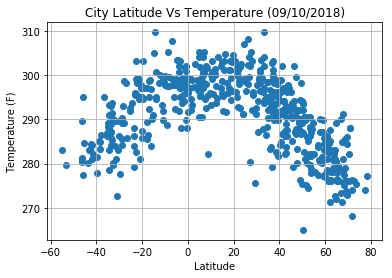

In [18]:
# Build a scatter plot for each data type
x_vals = cities_df["Latitude"]
y_vals = cities_df["Temperature"]
# Build a scatter plot for each data type
 
Temp_lat = plt.scatter(x_vals, y_vals, marker="o") 

# Incorporate the other graph properties
plt.title("City Latitude Vs Temperature (09/10/2018)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureVslatitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

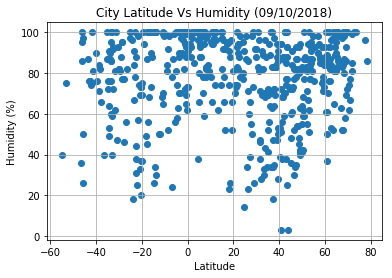

In [19]:
# Build a scatter plot for each data type
x_vals = cities_df["Latitude"]
y_vals = cities_df["Humidity"]
# Build a scatter plot for each data type
Hum_lat = plt.scatter(x_vals, y_vals, marker="o") 
 

# Incorporate the other graph properties

plt.title("City Latitude Vs Humidity (09/10/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

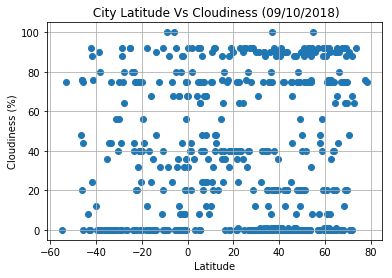

In [20]:
# Build a scatter plot for each data type
x_vals = cities_df["Latitude"]
y_vals = cities_df["Cloudiness"]
# Build a scatter plot for each data type
Cloudiness_lat = plt.scatter(x_vals, y_vals, marker="o") 
 

# Incorporate the other graph properties

plt.title(" City Latitude Vs Cloudiness (09/10/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CouldinessVslatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

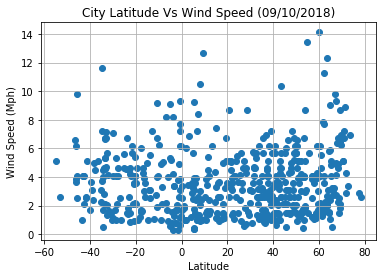

In [21]:
# Build a scatter plot for each data type
x_vals = cities_df["Latitude"]
y_vals = cities_df["WindSpeed"]
# Build a scatter plot for each data type
Wind_lat = plt.scatter(x_vals, y_vals, marker="o") 
 

# Incorporate the other graph properties

plt.title("City Latitude Vs Wind Speed (09/10/2018)")
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedVslatitude.png")

# Show plot
plt.show()